In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import numpy as np
import seaborn as sns

In [14]:
df2 = pd.read_csv('MKB.csv')

In [79]:
df2.head()

,Episode,Content,Views,Likes,Dislikes,Cleaned_content,Total_words,Words_without_stop,Year,LdRatio
0,20211024,"My dear countrymen,\nNamaskar…namaskar a billi...",24394,1799,627,dear countrymen namaskar namaskar billion time...,4904,3014,2021,2.86922
1,20210926,"My dear countrymen,\nNamaskar. You are aware t...",22728,1310,490,dear countrymen namaskar aware important progr...,4266,2564,2021,2.67347
2,20210829,"My dear countrymen, Namaskar.\nAll of us know ...",12047,416,1156,dear countrymen namaskar us know today birth a...,4579,2799,2021,0.359862
3,20210725,"My dear countrymen, Namaskar. A few amazing pi...",50659,2332,5577,dear countrymen namaskar amazing pictures take...,4510,2782,2021,0.418146
4,20210627,"My dear countrymen, Namaskar.\nOften in Mann K...",71155,1828,11115,dear countrymen namaskar often mann ki baat vo...,5572,3451,2021,0.164462


In [6]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df2['Cleaned_content'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df2['Episode']
df_dtm.head(3)

,aaba,aadarsh,aadhar,aaguner,aakashvani,aamra,aanganbari,aanganwadi,aapada,aapadratopi,...,सर,सरद,सरलम,सरसम,सस,सहय,हट,हप,हरत,हस
Episode,,,,,,,,,,,,,,,,,,,,,
20211024,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210829,0,0,0,0,0,0,0,0,0,0,...,2,1,1,1,0,0,0,1,0,2


#### Generating WordCloud

In [ ]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  #plt.show()
  plt.savefig('wordcloud/'+title+'.png')
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    print("Ep date: ",product)
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),str(product))

In [5]:
all_text = " "


for i in range(0,81):
    all_text += df2['Cleaned_content'][i] + " "

Analyzing length of speech over the years

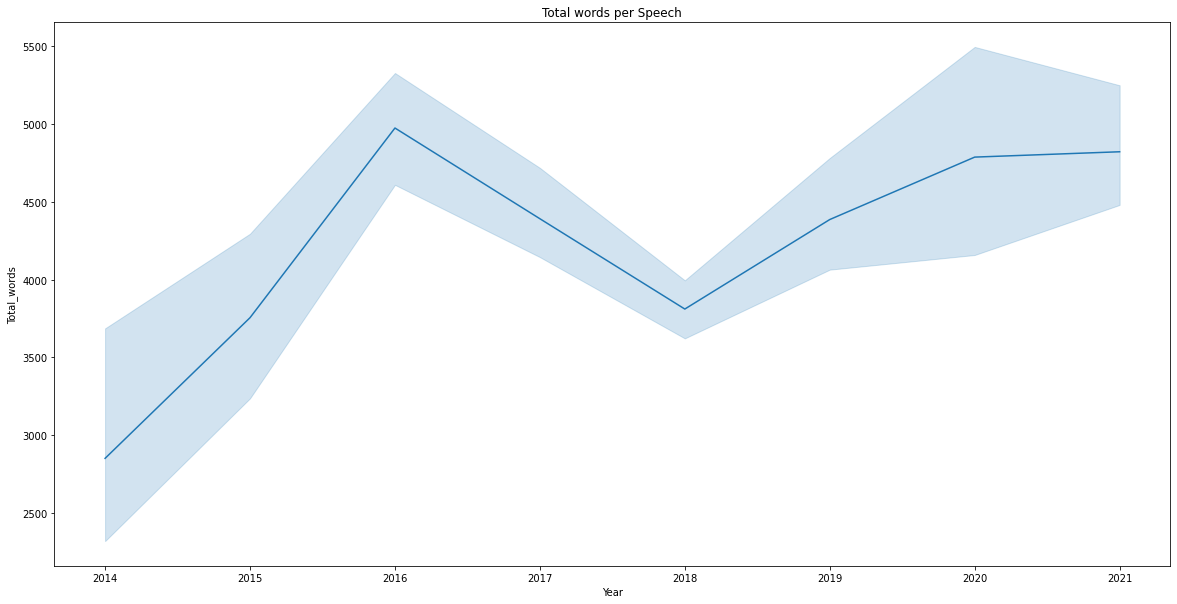

In [7]:
plt.figure(figsize = (20,10))
sns.lineplot(x = df2.Year, y = df2.Total_words).set(title = "Total words per Speech")
plt.show()

Length of Speech with Stopwords vs Without StopWords

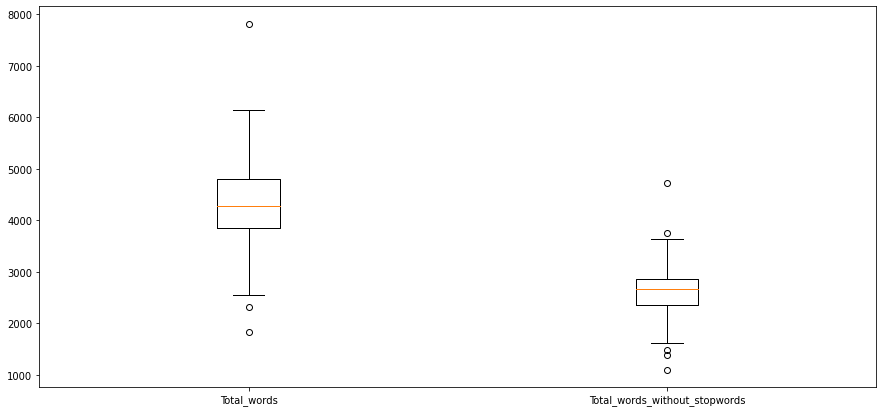

In [8]:

#temp_df = df2[['Total_words','Words_without_stop']]

plt.figure(figsize = (15,7))
plt.boxplot([df2['Total_words'], df2['Words_without_stop']],labels = ['Total_words','Total_words_without_stopwords'])

plt.show()

Number of Episodes from each year

<AxesSubplot:ylabel='Episode'>

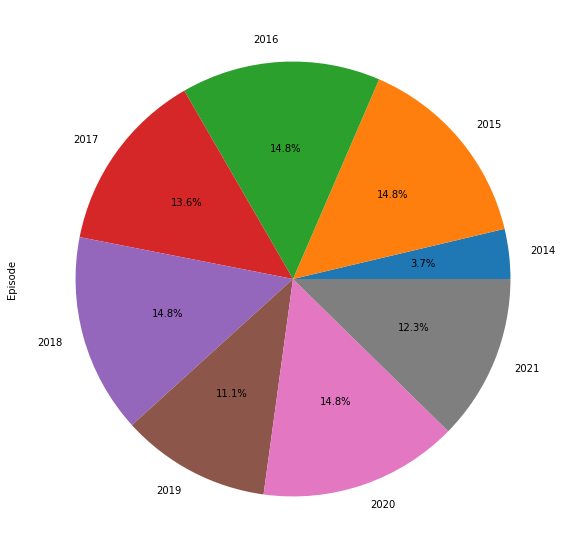

In [9]:
fig,ax = plt.subplots()
df2.groupby("Year")["Episode"].count().plot.pie(figsize = (10,10), autopct = '%1.1f%%')

Common Words that appear through all the speeches

In [156]:
from nltk import FreqDist
dist = FreqDist(x for x in all_text.split(' ') if x.isalnum())
common_words = pd.DataFrame(dist.most_common(10), columns = ['Word', 'Frequency'])

In [157]:
common_words

,Word,Frequency
0,people,1498
1,also,1387
2,india,1321
3,country,1245
4,one,1049
5,many,975
6,us,799
7,countrymen,746
8,time,731
9,new,726


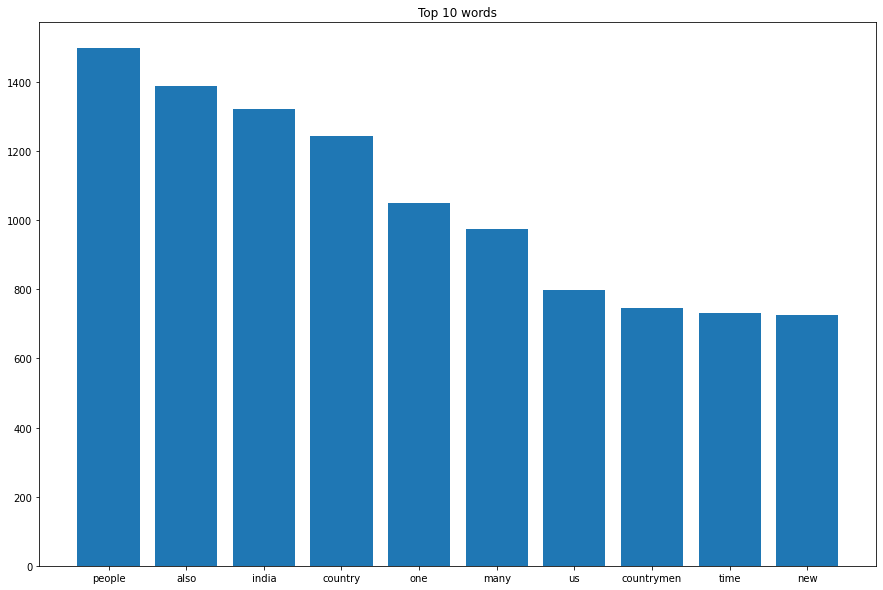

In [158]:
plt.figure(figsize = (15,10))
plt.bar(common_words['Word'],common_words['Frequency'])
plt.title("Top 10 words")
plt.show()

Analyzing Common words year-by-year

In [99]:
years = [2014,2015,2016,2017,2018,2019,2020,2021]

In [83]:
temp = df2.groupby('Year')["Cleaned_content"]

In [101]:
data = {}
for x in years:
    temp_df = temp.get_group(x)
    temp_text = " "
    for i in temp_df.index:
        temp_text += temp_df[i]+" "
    data[x] = temp_text
    

In [106]:
from nltk import FreqDist
final = {}
for key,val in data.items():
    dist = FreqDist(x for x in val.split(' ') if x.isalnum())
    final[key] = dist.most_common(10)
    #common_words = pd.DataFrame(dist.most_common(10), columns = ['Word', 'Frequency'])
    #print(common_words.head())

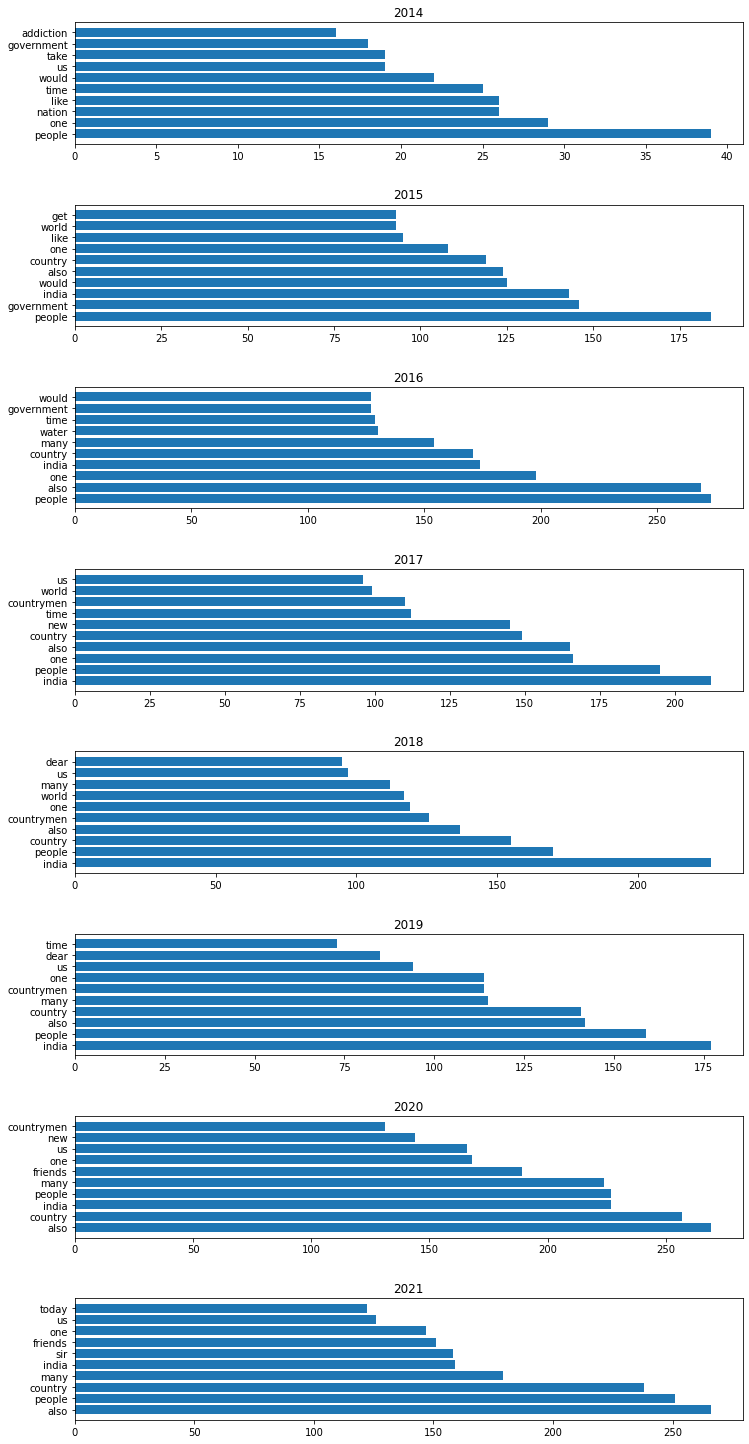

In [154]:
fig, ax = plt.subplots(len(final), 1, figsize=(10,20))
fig.tight_layout()
for a,key in zip(ax,final.keys()):
    temp_df = pd.DataFrame(final[key])
    y = list(temp_df[1])
    x = list(temp_df[0])
    a.barh(x,y)
    a.title.set_text(key)
    fig.subplots_adjust(hspace=0.5)
    # add labels/titles and such here

plt.show()

Youtube Views for each episode

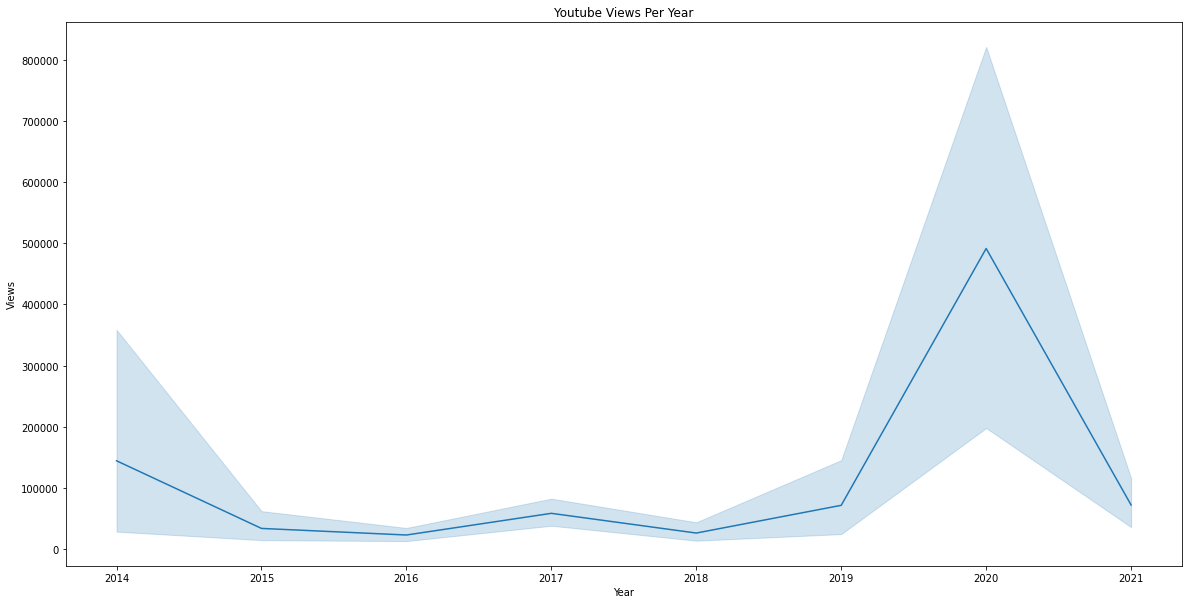

In [82]:
plt.figure(figsize = (20,10))
sns.lineplot(x = df2.Year, y = df2.Views).set(title = "Youtube Views Per Year")
plt.show()

Pattern of Like to Dislike Ratio over the years

In [63]:
ld = df2[['Year','Likes','Dislikes']]

In [64]:
ld= ld[ld['Dislikes'] != 0].reset_index(drop = True)

In [65]:
ld

,Year,Likes,Dislikes
0,2021,1799,627
1,2021,1310,490
2,2021,416,1156
3,2021,2332,5577
4,2021,1828,11115
...,...,...,...
62,2015,3116,346
63,2015,317,9
64,2014,4378,3992
65,2014,434,183


In [61]:
ld.describe()

,Year,Likes,Dislikes
count,67.000000,67.000000,67.000000
mean,2017.447761,2970.805970,4857.910448
std,2.126910,13731.889831,25055.473845
min,2014.000000,26.000000,4.000000
25%,2016.000000,227.000000,27.500000
50%,2017.000000,481.000000,85.000000
75%,2019.000000,1343.500000,429.500000
max,2021.000000,112036.000000,204085.000000


In [66]:

ld_ratio = []
for i in range(0,67):
    ld_ratio.append(ld["Likes"][i] / ld["Dislikes"][i])

In [67]:
ld['ratio'] = ld_ratio

<Figure size 1728x720 with 0 Axes>

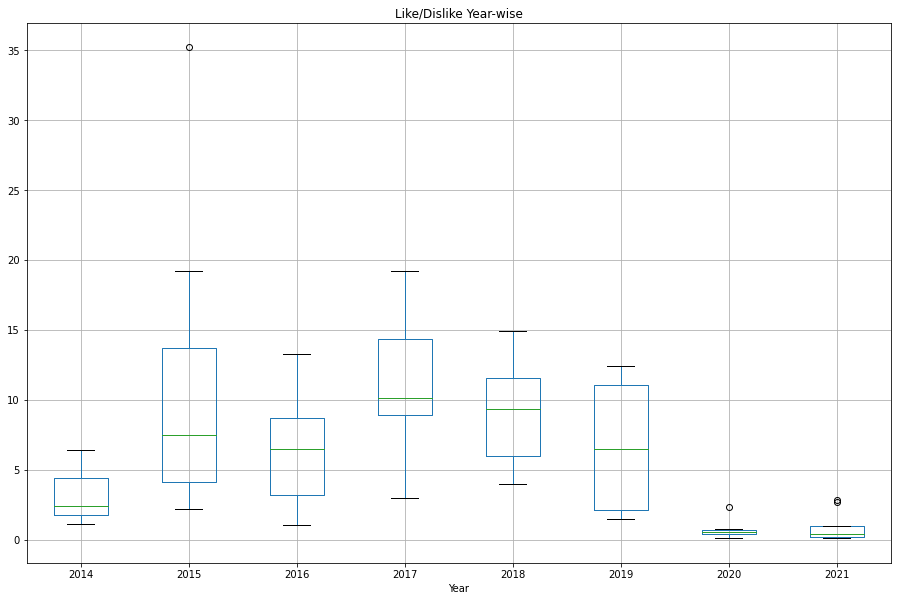

In [78]:
plt.figure(figsize = (24,10))

ld.boxplot(column = ['ratio'], by = 'Year',figsize=(15,10)).set(title = "Like/Dislike Year-wise")
plt.suptitle('')
plt.show()